In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [109]:
df = pd.read_csv('C:/Users/User/Desktop/Results/FACEBOOK FILES/merged_file_final_fb.csv')

In [110]:
to_drop = ['image_id', 'Facebook Id', 'Page Category', 'Page Name', 'Page Description', 'Page Created', 'Post Created',
           'Post Created Date', 'Type', 'Love', 'Wow', 'Haha', 'Sad', 'Angry' , 'Care',
           'Video Share Status', 'Is Video Owner?', 'Post Views', 'Total Views', 'Total Views For All Crossposts', 
           'Video Length', 'URL', 'Message', 'Link', 'Final Link', 'Image Text', 'Link Text', 'Description', 'Sponsor Id', 
           'Sponsor Name', 'Sponsor Category', 'Likes', 'Comments', 'Shares','User Name', 'Page Admin Top Country', 'Likes at Posting', 'Post Created Time',
           'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )']
#'Likes', 'Comments', 'Shares', 'Likes at Posting'

df = df.drop(to_drop, axis=1)
df = df.dropna()
df

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,...,Total Interactions,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,0,1,1,0,0,0,0,green,...,127,HIGH,0,0,0,0,0,1,0,0
1,0,1,1,1,2,1,0,0,0,blue,...,312,HIGH,0,0,0,0,0,1,0,0
2,0,1,1,1,2,0,0,0,1,grey,...,77,HIGH,0,0,0,0,0,1,0,0
3,0,1,0,1,1,0,0,0,0,purple,...,332,HIGH,0,1,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,grey,...,71,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,1,1,1,1,2,0,0,0,0,cyan,...,269,HIGH,0,1,0,0,0,1,0,0
2566,0,0,0,0,0,1,0,0,0,blue,...,211,LOW,0,0,0,0,0,0,0,0
2567,0,1,1,1,2,0,0,0,0,cyan,...,162,HIGH,0,1,0,0,0,0,0,0
2568,1,1,0,1,2,0,0,0,0,grey,...,133,HIGH,0,1,0,0,0,0,1,0


In [111]:
def change_types(df):
    df['Followers at Posting'] = df['Followers at Posting'].astype('int64')
    df['Child'] = df['Child'].astype('int64')
    df['Smile'] = df['Smile'].astype('int64')
    df['Female'] = df['Female'].astype('int64')
    df['Male'] = df['Male'].astype('int64')
    df['PeopleNumber'] = df['PeopleNumber'].astype('int64')
    df['Text'] = df['Text'].astype('int64')
    df['close_up'] = df['close_up'].astype('int64')
    df['Indoors'] = df['Indoors'].astype('int64')
    df['Outdoors'] = df['Outdoors'].astype('int64')
    return df

In [112]:
df = change_types(df)

In [113]:
df.dtypes

Child                    int64
Smile                    int64
Female                   int64
Male                     int64
PeopleNumber             int64
Text                     int64
close_up                 int64
Indoors                  int64
Outdoors                 int64
dominantColor           object
LOGO                     int64
Followers at Posting     int64
Total Interactions       int64
Contrast                object
ANGRY                    int64
CALM                     int64
CONFUSED                 int64
DISGUSTED                int64
FEAR                     int64
HAPPY                    int64
SAD                      int64
SURPRISED                int64
dtype: object

In [114]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0
mean,0.4,0.8,0.7,0.4,1.2,0.2,0.0,0.1,0.1,0.6,8070202.2,74754.6,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,0.5,12171064.1,387478.2,0.1,0.5,0.1,0.0,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7233.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,138347.2,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,865509.5,288.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,26164014.0,4240.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,29486754.0,5750308.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


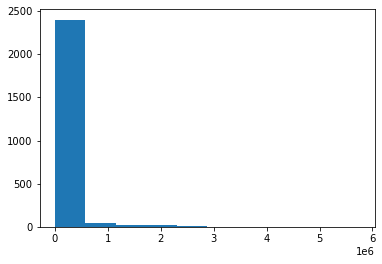

In [115]:
plt.hist(df['Total Interactions'], bins=10)
plt.show()

In [116]:
new_df = df[df['Total Interactions'] < df['Total Interactions'].quantile(0.90)]
# new_df = df[(df['Total Interactions'] < df['Total Interactions'].quantile(0.80)) & (df['Total Interactions'] > df['Total Interactions'].quantile(0.20))]
# plt.hist(new_df['Total Interactions'])

In [117]:
new_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0
mean,0.4,0.8,0.7,0.4,1.2,0.3,0.0,0.1,0.1,0.5,5904733.4,2043.8,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,0.5,10843759.2,4203.0,0.1,0.5,0.1,0.0,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7233.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,136067.2,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,396180.0,252.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1957430.8,640.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,29486754.0,21212.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [118]:
df[df['Total Interactions']>100000].count()

Child                   148
Smile                   148
Female                  148
Male                    148
PeopleNumber            148
Text                    148
close_up                148
Indoors                 148
Outdoors                148
dominantColor           148
LOGO                    148
Followers at Posting    148
Total Interactions      148
Contrast                148
ANGRY                   148
CALM                    148
CONFUSED                148
DISGUSTED               148
FEAR                    148
HAPPY                   148
SAD                     148
SURPRISED               148
dtype: int64

In [119]:
y = new_df['Total Interactions']
y = (y/new_df['Followers at Posting'])*1000
y

0       1.739321
1       4.263926
2       1.051539
3       4.525442
4       0.967250
          ...   
2565    1.760828
2566    1.379175
2567    1.055932
2568    0.856490
2569    0.594462
Length: 2250, dtype: float64

C:\Users\User\anaconda3\envs\Diplomatiki\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    2250.000000
mean        1.469823
std         3.565633
min         0.004986
25%         0.239178
50%         0.561206
75%         1.417269
max        72.325603
dtype: float64

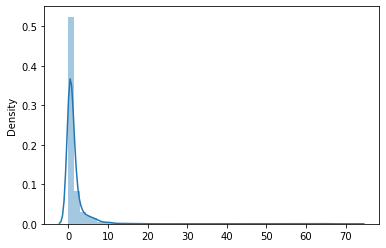

In [120]:
sns.distplot(y)
y.describe()

In [121]:
X = new_df.drop(['Total Interactions','Followers at Posting'], axis=1)
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,LOGO,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,0,1,1,0,0,0,0,green,0,HIGH,0,0,0,0,0,1,0,0
1,0,1,1,1,2,1,0,0,0,blue,0,HIGH,0,0,0,0,0,1,0,0
2,0,1,1,1,2,0,0,0,1,grey,0,HIGH,0,0,0,0,0,1,0,0
3,0,1,0,1,1,0,0,0,0,purple,0,HIGH,0,1,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,grey,0,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,1,1,1,1,2,0,0,0,0,cyan,1,HIGH,0,1,0,0,0,1,0,0
2566,0,0,0,0,0,1,0,0,0,blue,1,LOW,0,0,0,0,0,0,0,0
2567,0,1,1,1,2,0,0,0,0,cyan,1,HIGH,0,1,0,0,0,0,0,0
2568,1,1,0,1,2,0,0,0,0,grey,1,HIGH,0,1,0,0,0,0,1,0


In [122]:
X = pd.get_dummies(data=X)
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,1,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,1,2,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,1,1,1,1,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2566,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2567,0,1,1,1,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2568,1,1,0,1,2,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [123]:
# y = (y - y.min())/(y.max() - y.min())

In [124]:
def change_types(X):
    X['dominantColor_blue'] =X['dominantColor_blue'].astype('int64')
    X['dominantColor_brown'] =X['dominantColor_brown'].astype('int64')
    X['dominantColor_cyan'] =X['dominantColor_cyan'].astype('int64')
    X['dominantColor_green'] =X['dominantColor_green'].astype('int64')
    X['dominantColor_grey'] =X['dominantColor_grey'].astype('int64')
    X['dominantColor_orange'] =X['dominantColor_orange'].astype('int64')
    X['dominantColor_pink'] =X['dominantColor_pink'].astype('int64')
    X['dominantColor_purple'] =X['dominantColor_purple'].astype('int64')
    X['dominantColor_red'] =X['dominantColor_red'].astype('int64')
    X['dominantColor_white'] =X['dominantColor_white'].astype('int64')
    X['dominantColor_yellow'] =X['dominantColor_yellow'].astype('int64')
    X['Contrast_HIGH'] =X['Contrast_HIGH'].astype('int64')
    X['Contrast_LOW'] =X['Contrast_LOW'].astype('int64')
    return X

In [125]:
X = change_types(X)
X.dtypes

Child                   int64
Smile                   int64
Female                  int64
Male                    int64
PeopleNumber            int64
Text                    int64
close_up                int64
Indoors                 int64
Outdoors                int64
LOGO                    int64
ANGRY                   int64
CALM                    int64
CONFUSED                int64
DISGUSTED               int64
FEAR                    int64
HAPPY                   int64
SAD                     int64
SURPRISED               int64
dominantColor_blue      int64
dominantColor_brown     int64
dominantColor_cyan      int64
dominantColor_green     int64
dominantColor_grey      int64
dominantColor_orange    int64
dominantColor_pink      int64
dominantColor_purple    int64
dominantColor_red       int64
dominantColor_white     int64
dominantColor_yellow    int64
Contrast_HIGH           int64
Contrast_LOW            int64
dtype: object

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train) # Training
y_pred = rf_reg.predict(X_test) # The predicted y

In [128]:
print(metrics.mean_squared_error(y_test, y_pred))

print(metrics.median_absolute_error(y_test, y_pred))

print(metrics.mean_absolute_percentage_error(y_test, y_pred))

17.02982982170778
0.7405051326246122
3.6900277945287234


In [129]:
rf_reg.score(X_test, y_test)

-0.22416784276842527

In [130]:
for imp, name in zip(rf_reg.feature_importances_, rf_reg.feature_names_in_):
    print(name, imp)

Child 0.08203937362729054
Smile 0.007624998614710153
Female 0.06938150558253622
Male 0.05828530373274241
PeopleNumber 0.10592759456464054
Text 0.046099214217556875
close_up 0.015523326553295726
Indoors 0.019409991946957205
Outdoors 0.03690691527459577
LOGO 0.05608574818306737
ANGRY 0.008915508237051553
CALM 0.10823544860758896
CONFUSED 0.002365939054468908
DISGUSTED 0.00022620670933053927
FEAR 0.02127196349457943
HAPPY 0.10047614219983257
SAD 0.06786441483133401
SURPRISED 0.008127938018455235
dominantColor_blue 0.006419094965087784
dominantColor_brown 0.04278979810469686
dominantColor_cyan 0.03596922403803593
dominantColor_green 0.005235510873478014
dominantColor_grey 0.054519391325430405
dominantColor_orange 2.619262288900353e-05
dominantColor_pink 0.00040076913272715054
dominantColor_purple 0.0017983851898996906
dominantColor_red 0.02600652001217784
dominantColor_white 0.0007006271403856636
dominantColor_yellow 0.0009095928673709208
Contrast_HIGH 0.005062791721696846
Contrast_LOW 0.0

In [131]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [132]:
model.score(X_test, y_test)

0.027613830604203526

## Balance dataset

In [133]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd

In [134]:
X['Targets']=y

In [135]:
X = downsample(X, 'Targets')
y = X['Targets']

In [136]:
X = X.drop('Targets', axis=1)

In [137]:
X.shape

(2243, 31)

In [138]:
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2239,1,1,1,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2240,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2241,1,1,0,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train) # Training
y_pred = rf_reg.predict(X_test) # The predicted y

In [141]:
rf_reg.score(X_test, y_test)

-0.12590403174055065

In [142]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [143]:
model.score(X_test, y_test)

-0.0064171268231734135

In [144]:
important_features = pd.Series(data=rf_reg.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

HAPPY                   0.112952
CALM                    0.111152
Text                    0.085976
Male                    0.080547
Child                   0.076443
PeopleNumber            0.076235
FEAR                    0.067811
LOGO                    0.055221
Female                  0.051284
Outdoors                0.037742
dominantColor_cyan      0.034194
dominantColor_brown     0.033730
SAD                     0.029940
dominantColor_grey      0.026036
Indoors                 0.023564
close_up                0.021836
dominantColor_red       0.019040
SURPRISED               0.012964
ANGRY                   0.010802
CONFUSED                0.006358
dominantColor_blue      0.005989
dominantColor_green     0.004362
Smile                   0.004339
dominantColor_yellow    0.003427
dominantColor_purple    0.003006
Contrast_HIGH           0.001970
Contrast_LOW            0.001776
dominantColor_white     0.000535
dominantColor_pink      0.000531
DISGUSTED               0.000213
dominantCo

In [145]:
predictions = model.predict(X_test)

C:\Users\User\anaconda3\envs\Diplomatiki\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Targets'>

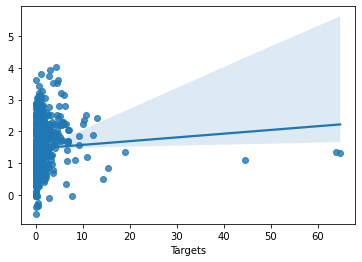

In [146]:
sns.regplot(y_test,predictions)